# Análisis de dataset vacunación covid19 Argentina
### Este análisis se realiza sobre un dataset descargado del link http://datos.salud.gob.ar/dataset/vacunas-contra-covid-19-dosis-aplicadas-en-la-republica-argentina en el mes de Agosto 2021

### La idea es poder ver gráficamente la cantidad de vacunas aplicadas por tipo de vacuna y por jurisdicción

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Covid19VacunasAgrupadas.csv")
df.head()

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,primera_dosis_cantidad,segunda_dosis_cantidad
0,6,Buenos Aires,AstraZeneca ChAdOx1 S recombinante,3309236,1696566
1,6,Buenos Aires,COVISHIELD ChAdOx1nCoV COVID 19,250750,309
2,6,Buenos Aires,Moderna ARNm,114488,561170
3,6,Buenos Aires,Sinopharm Vacuna SARSCOV 2 inactivada,3233955,1486656
4,6,Buenos Aires,Sputnik V COVID19 Instituto Gamaleya,3715473,1139473


### Vemos en la columna "vacuna_nombre" que las vacunas de AstraZeneca se separan en dos "AstraZeneca ChAdOx1 S recombinante" y "COVISHIELD ChAdOx1nCoV COVID 19". Esto no me sirve así que chequeo todos los nombres de esa columna con .unique() y agrupo por tipo de vacuna utilizando .map()   

In [3]:
df["vacuna_nombre"].unique()

array(['AstraZeneca ChAdOx1 S recombinante',
       'COVISHIELD ChAdOx1nCoV COVID 19', 'Moderna ARNm',
       'Sinopharm Vacuna SARSCOV 2 inactivada',
       'Sputnik V COVID19 Instituto Gamaleya'], dtype=object)

In [4]:
df["vacuna_nombre"] = df["vacuna_nombre"].map({"AstraZeneca ChAdOx1 S recombinante":"AstraZeneca",
                                              "COVISHIELD ChAdOx1nCoV COVID 19":"AstraZeneca",
                                              "Moderna ARNm":"Moderna",
                                              "Sinopharm Vacuna SARSCOV 2 inactivada":"Sinopharm",
                                              "Sputnik V COVID19 Instituto Gamaleya":"Sputnik V"},
                                              na_action=None) 

### Chequeo como queda el dataset hasta ahora

In [5]:
df.head()

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,primera_dosis_cantidad,segunda_dosis_cantidad
0,6,Buenos Aires,AstraZeneca,3309236,1696566
1,6,Buenos Aires,AstraZeneca,250750,309
2,6,Buenos Aires,Moderna,114488,561170
3,6,Buenos Aires,Sinopharm,3233955,1486656
4,6,Buenos Aires,Sputnik V,3715473,1139473


### Mejor, pero ahora necesito agrupar las AstraZeneca en una sola fila por jurisdicción, y por supuesto sumar las cantidades

In [77]:
df = df.groupby(["jurisdiccion_codigo_indec","jurisdiccion_nombre","vacuna_nombre"], as_index=False)[["primera_dosis_cantidad","segunda_dosis_cantidad"]].sum()


### Chequeo nuevamente

In [78]:
df.head()

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,primera_dosis_cantidad,segunda_dosis_cantidad
0,2,CABA,AstraZeneca,721031,414440
1,2,CABA,Moderna,15623,199805
2,2,CABA,Sinopharm,618354,392102
3,2,CABA,Sputnik V,822848,257662
4,6,Buenos Aires,AstraZeneca,3559986,1696875


#### Por último antes de empezar a graficar voy a crear una nueva columna que sume las primeras y segundas dosis para tener un total de vacuna aplicadas

In [20]:
df["total_aplicaciones"] = df["primera_dosis_cantidad"] + df["segunda_dosis_cantidad"]
df.head()

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,primera_dosis_cantidad,segunda_dosis_cantidad,total_aplicaciones
0,2,CABA,AstraZeneca,721031,414440,1135471
1,2,CABA,Moderna,15623,199805,215428
2,2,CABA,Sinopharm,618354,392102,1010456
3,2,CABA,Sputnik V,822848,257662,1080510
4,6,Buenos Aires,AstraZeneca,3559986,1696875,5256861


### Ahora si voy a importar la librería matplotlib para empezar a graficar

In [24]:
import matplotlib.pyplot as plt

### Lo primero que quiero ver es la cantidad de aplicaciones por tipo de vacuna, así que creo un df con esas dos variables y genero un gráfico de torta

In [41]:
por_vacuna = df.groupby(["vacuna_nombre"], as_index=False)[["total_aplicaciones"]].sum()
por_vacuna.head()

,vacuna_nombre,total_aplicaciones
0,AstraZeneca,13863809
1,Moderna,1740587
2,Sinopharm,12727431
3,Sputnik V,12629362


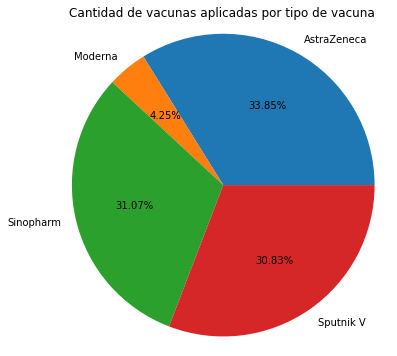

In [80]:
plt.figure(figsize = (6,6))
plt.pie(por_vacuna["total_aplicaciones"], labels=por_vacuna["vacuna_nombre"], autopct='%1.2f%%')
plt.axis("equal")
plt.title("Cantidad de vacunas aplicadas por tipo de vacuna")
plt.show()

### Podemos ver que la más aplicada es AstraZeneca. Si no hubiésemos agrupado los dos nombres diferentes que recibe este tipo de vacuna probablemente estaríamos viendo Sinopharm como la mas aplicada

### Ahora quiero ver la cantidad de aplicaciones por jurisdicción. Repito el procedimiento anterior

In [43]:
por_juris = df.groupby(["jurisdiccion_nombre"], as_index=False)[["total_aplicaciones"]].sum()
por_juris.head()

,jurisdiccion_nombre,total_aplicaciones
0,Buenos Aires,15508076
1,CABA,3441865
2,Catamarca,370590
3,Chaco,927030
4,Chubut,503485


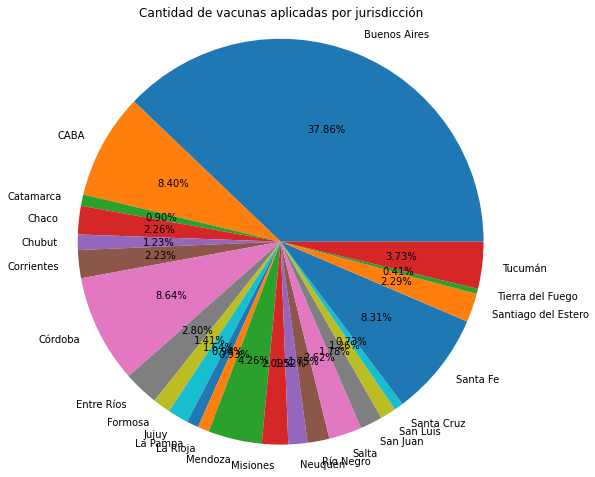

In [79]:
plt.figure(figsize = (8,8))
plt.pie(por_juris["total_aplicaciones"], labels=por_juris["jurisdiccion_nombre"], autopct='%1.2f%%')
plt.axis("equal")
plt.title("Cantidad de vacunas aplicadas por jurisdicción")
plt.show()

### Por más que aumentemos el tamaño del gráfico, es bastante difícil de apreciar, así que voy a probar con un gráfico de barras

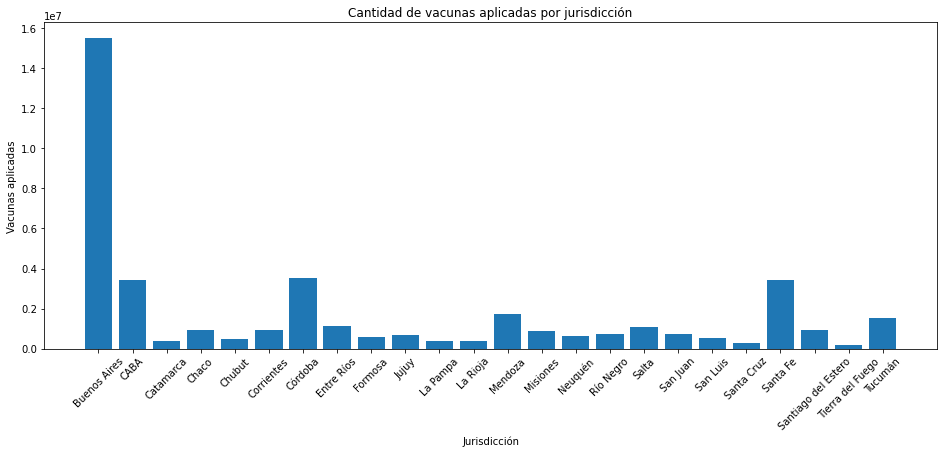

In [68]:
plt.figure(figsize = (16,6))
plt.bar(por_juris["jurisdiccion_nombre"], por_juris["total_aplicaciones"])
plt.title("Cantidad de vacunas aplicadas por jurisdicción")
plt.xlabel("Jurisdicción")
plt.xticks(rotation=45)
plt.ylabel("Vacunas aplicadas")
plt.show()

### Efectivamente para este caso las barras comunican mejor. Pero ahora quiero ver lo mismo pero distinguiendo la primera de la segunda dosis

In [73]:
ver_dosis = df.groupby(["jurisdiccion_nombre"], as_index=False)[["primera_dosis_cantidad","segunda_dosis_cantidad"]].sum()
ver_dosis.head()

,jurisdiccion_nombre,primera_dosis_cantidad,segunda_dosis_cantidad
0,Buenos Aires,10623902,4884174
1,CABA,2177856,1264009
2,Catamarca,278900,91690
3,Chaco,643499,283531
4,Chubut,346158,157327


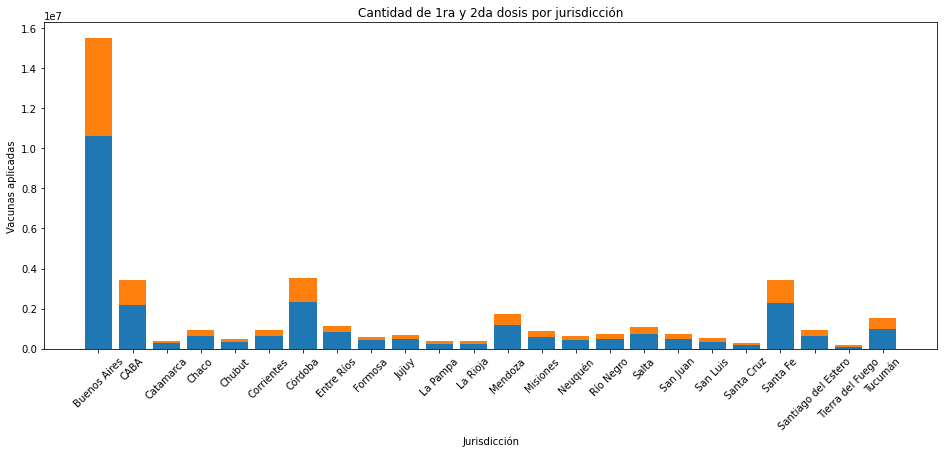

In [81]:
plt.figure(figsize = (16,6))
plt.bar(ver_dosis["jurisdiccion_nombre"], ver_dosis["primera_dosis_cantidad"])
plt.bar(ver_dosis["jurisdiccion_nombre"], ver_dosis["segunda_dosis_cantidad"], bottom=ver_dosis["primera_dosis_cantidad"])
plt.title("Cantidad de 1ra y 2da dosis por jurisdicción")
plt.xlabel("Jurisdicción")
plt.xticks(rotation=45)
plt.ylabel("Vacunas aplicadas")
plt.show()